In [6]:
!pip install watermark

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     --------- --------------------------- 61.4/250.0 kB 544.7 kB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import watermark

%matplotlib inline
%load_ext watermark

In [3]:
%watermark -n -v -m -g -iv

FileNotFoundError: [WinError 2] Не удается найти указанный файл

# Очистка данных, приведение в рабочее состояние

## GDP

In [3]:
GDP = pd.read_excel('data/GDP.xlsx')
GDP['date'] = pd.to_datetime(GDP['date'], format='%d-%m-%Y')
# Удаление ненужных колонок
GDP = GDP[['date', 'Nominal GDP Index', 'Real GDP Index']]
GDP.head()

,date,Nominal GDP Index,Real GDP Index
0,2020-01-01,22015.312813,20959.675271
1,2020-02-01,22119.357184,21057.624317
2,2020-03-01,20984.869002,19980.245161
3,2020-04-01,18943.037407,18153.868201
4,2020-05-01,19820.181691,18962.320501


## CPI

In [4]:
CPI = pd.read_csv('data/cpi.csv', sep='"', decimal=',')
CPI = CPI['date, "value"'].str.split(',', expand=True)
CPI.head()

,0,1,2
0,10.2023,"""3","7%"""
1,09.2023,"""3","7%"""
2,08.2023,"""3","7%"""
3,07.2023,"""3","2%"""
4,06.2023,"""3","0%"""


In [5]:
CPI['date'] = pd.to_datetime(CPI[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
CPI[1] = CPI[1].str.replace('"', '').astype('float')
CPI[2] = CPI[2].str.replace('"', '')
CPI[2] = CPI[2].str.rstrip('%').astype('float')
CPI['value'] = (CPI[1] + CPI[2]/10)
# Удаление ненужных колонок
CPI = CPI[['date', 'value']]

CPI.head()


,date,value
0,2023-10-01,3.7
1,2023-09-01,3.7
2,2023-08-01,3.7
3,2023-07-01,3.2
4,2023-06-01,3.0


## Rate Desicion

In [6]:
RD = pd.read_csv('data/rate_desicion.csv', sep='"', decimal=',')
RD = RD['date, "value"'].str.split(',', expand=True)
RD.head()

,0,1,2
0,10.2023,"""5","50%"""
1,09.2023,"""5","50%"""
2,08.2023,"""5","50%"""
3,07.2023,"""5","50%"""
4,06.2023,"""5","25%"""


In [7]:
RD['date'] = pd.to_datetime(RD[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
RD[1] = RD[1].str.replace('"', '').astype('float')
RD[2] = RD[2].str.replace('"', '')
RD[2] = RD[2].str.rstrip('%').astype('float')
RD['value'] = (RD[1] + RD[2]/100)
# Удаление ненужных колонок
RD = RD[['date', 'value']]

RD.head()


,date,value
0,2023-10-01,5.50
1,2023-09-01,5.50
2,2023-08-01,5.50
3,2023-07-01,5.50
4,2023-06-01,5.25


## Unemployment

In [8]:
UnEm = pd.read_csv('data/unemployment.csv', sep='"', decimal=',')
# Убираем кавычки вокруг столбца "value" и преобразуем его в числовой формат
UnEm = UnEm['date, "value"'].str.split(',', expand=True)
UnEm.head()

,0,1,2
0,10.2023,"""3","9%"""
1,09.2023,"""3","8%"""
2,08.2023,"""3","8%"""
3,07.2023,"""3","5%"""
4,06.2023,"""3","6%"""


In [9]:
UnEm['date'] = pd.to_datetime(UnEm[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
UnEm[1] = UnEm[1].str.replace('"', '').astype('float')
UnEm[2] = UnEm[2].str.replace('"', '')
UnEm[2] = UnEm[2].str.rstrip('%').astype('float')
UnEm['value'] = (UnEm[1] + UnEm[2]/10)
# Удаление ненужных колонок
UnEm = UnEm[['date', 'value']]

UnEm.head()


,date,value
0,2023-10-01,3.9
1,2023-09-01,3.8
2,2023-08-01,3.8
3,2023-07-01,3.5
4,2023-06-01,3.6


## Bank of America

In [10]:
BAC = pd.read_csv('data/BAC.csv', sep='"', decimal=',')
columns_names = list(BAC.columns.values)
print(columns_names)
BAC

['Дата,', 'Цена', ',', 'Откр.', ',.1', 'Макс.', ',.2', 'Мин.', ',.3', 'Объём', ',.4', 'Изм. %', 'Unnamed: 12']


,"Дата,",Цена,",",Откр.,",.1",Макс.,",.2",Мин.,",.3",Объём,",.4",Изм. %,Unnamed: 12
0,"31.10.2023,",26.34,",",25.74,",",26.38,",",25.72,",","49,57M",",","2,53%",NaN
1,"30.10.2023,",25.69,",",25.32,",",25.78,",",25.28,",","41,22M",",","2,07%",NaN
2,"27.10.2023,",25.17,",",26.07,",",26.07,",",24.96,",","64,71M",",","-3,64%",NaN
3,"26.10.2023,",26.12,",",25.49,",",26.36,",",25.44,",","60,32M",",","2,23%",NaN
4,"25.10.2023,",25.55,",",25.38,",",25.65,",",25.18,",","45,16M",",","0,31%",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,"08.01.2020,",34.97,",",34.57,",",35.19,",",34.55,",","45,34M",",","1,01%",NaN
961,"07.01.2020,",34.62,",",34.70,",",34.92,",",34.53,",","34,35M",",","-0,66%",NaN
962,"06.01.2020,",34.85,",",34.41,",",34.90,",",34.37,",","42,23M",",","-0,14%",NaN
963,"03.01.2020,",34.90,",",34.98,",",35.15,",",34.76,",","50,76M",",","-2,08%",NaN


In [11]:
# Приводим "date" в нормальный вид
BAC['date'] = BAC[columns_names[0]].str.replace(',', '')
BAC['date'] = pd.to_datetime(BAC['date'].str.strip(), format='%d.%m.%Y')
BAC.head()

,"Дата,",Цена,",",Откр.,",.1",Макс.,",.2",Мин.,",.3",Объём,",.4",Изм. %,Unnamed: 12,date
0,"31.10.2023,",26.34,",",25.74,",",26.38,",",25.72,",","49,57M",",","2,53%",NaN,2023-10-31
1,"30.10.2023,",25.69,",",25.32,",",25.78,",",25.28,",","41,22M",",","2,07%",NaN,2023-10-30
2,"27.10.2023,",25.17,",",26.07,",",26.07,",",24.96,",","64,71M",",","-3,64%",NaN,2023-10-27
3,"26.10.2023,",26.12,",",25.49,",",26.36,",",25.44,",","60,32M",",","2,23%",NaN,2023-10-26
4,"25.10.2023,",25.55,",",25.38,",",25.65,",",25.18,",","45,16M",",","0,31%",NaN,2023-10-25


In [12]:
BAC = BAC.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
BAC = BAC.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

BAC['Volume'] = BAC['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
BAC['Changes(%)'] = BAC['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
BAC

,Close,Open,Max,Min,Volume,Changes(%),date
0,26.34,25.74,26.38,25.72,4957.0,2.53,2023-10-31
1,25.69,25.32,25.78,25.28,4122.0,2.07,2023-10-30
2,25.17,26.07,26.07,24.96,6471.0,-3.64,2023-10-27
3,26.12,25.49,26.36,25.44,6032.0,2.23,2023-10-26
4,25.55,25.38,25.65,25.18,4516.0,0.31,2023-10-25
...,...,...,...,...,...,...,...
960,34.97,34.57,35.19,34.55,4534.0,1.01,2020-01-08
961,34.62,34.70,34.92,34.53,3435.0,-0.66,2020-01-07
962,34.85,34.41,34.90,34.37,4223.0,-0.14,2020-01-06
963,34.90,34.98,35.15,34.76,5076.0,-2.08,2020-01-03


In [13]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Close       965 non-null    float64       
 1   Open        965 non-null    float64       
 2   Max         965 non-null    float64       
 3   Min         965 non-null    float64       
 4   Volume      965 non-null    float64       
 5   Changes(%)  965 non-null    float64       
 6   date        965 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 52.9 KB


## Citi

In [14]:
Citi = pd.read_csv('data/C.csv', sep='"', decimal=',')
columns_names = list(Citi.columns.values)


# дату в нормальный вид
Citi['date'] = Citi[columns_names[0]].str.replace(',', '')
Citi['date'] = pd.to_datetime(Citi['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
Citi = Citi.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
Citi = Citi.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

Citi['Volume'] = Citi['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
Citi['Changes(%)'] = Citi['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
Citi

,Close,Open,Max,Min,Volume,Changes(%),date
0,39.49,39.04,39.53,38.92,1627.0,1.44,2023-10-31
1,38.93,38.55,38.97,38.41,2065.0,1.80,2023-10-30
2,38.24,39.33,39.37,38.17,2065.0,-2.80,2023-10-27
3,39.34,38.50,39.75,38.47,2492.0,1.89,2023-10-26
4,38.61,38.70,38.85,38.26,1508.0,-0.82,2023-10-25
...,...,...,...,...,...,...,...
960,79.36,78.77,80.00,78.68,1129.0,0.76,2020-01-08
961,78.76,79.29,79.30,78.73,1049.0,-0.87,2020-01-07
962,79.45,78.72,79.55,78.72,1007.0,-0.31,2020-01-06
963,79.70,79.80,80.52,79.45,1266.0,-1.88,2020-01-03


## JPM

In [15]:
JPM = pd.read_csv('data/JPM.csv', sep='"', decimal=',')
columns_names = list(JPM.columns.values)


# дату в нормальный вид
JPM['date'] = JPM[columns_names[0]].str.replace(',', '')
JPM['date'] = pd.to_datetime(JPM['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
JPM = JPM.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
JPM = JPM.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

JPM['Volume'] = JPM['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
JPM['Changes(%)'] = JPM['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
JPM

,Close,Open,Max,Min,Volume,Changes(%),date
0,139.06,137.71,139.24,137.47,902.0,1.19,2023-10-31
1,137.42,136.44,138.04,136.04,882.0,1.27,2023-10-30
2,135.69,138.95,139.10,135.19,1743.0,-3.60,2023-10-27
3,140.76,139.76,141.66,139.43,900.0,0.26,2023-10-26
4,140.40,140.57,141.18,139.51,732.0,-0.55,2023-10-25
...,...,...,...,...,...,...,...
960,136.94,135.70,137.58,135.60,970.0,0.78,2020-01-08
961,135.88,137.28,137.86,135.82,1058.0,-1.70,2020-01-07
962,138.23,136.56,138.27,136.50,1027.0,-0.08,2020-01-06
963,138.34,137.50,139.23,137.08,1039.0,-1.95,2020-01-03


## WFC

In [16]:
WFC = pd.read_csv('data/WFC.csv', sep='"', decimal=',')
columns_names = list(WFC.columns.values)


# дату в нормальный вид
WFC['date'] = WFC[columns_names[0]].str.replace(',', '')
WFC['date'] = pd.to_datetime(WFC['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
WFC = WFC.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
WFC = WFC.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

WFC['Volume'] = WFC['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
WFC['Changes(%)'] = WFC['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
WFC

,Close,Open,Max,Min,Volume,Changes(%),date
0,39.77,39.64,39.81,39.24,1075.0,0.86,2023-10-31
1,39.43,39.10,39.59,38.69,1168.0,1.73,2023-10-30
2,38.76,39.38,39.41,38.62,1358.0,-2.24,2023-10-27
3,39.65,39.02,39.97,38.98,1436.0,1.59,2023-10-26
4,39.03,39.07,39.21,38.58,1383.0,-0.64,2023-10-25
...,...,...,...,...,...,...,...
960,52.82,52.84,53.33,52.80,1659.0,0.30,2020-01-08
961,52.66,53.05,53.05,52.47,1329.0,-0.83,2020-01-07
962,53.10,52.74,53.20,52.72,1320.0,-0.60,2020-01-06
963,53.42,53.11,53.62,52.90,1561.0,-0.61,2020-01-03


In [17]:

all_df = pd.DataFrame()
all_df['date'] = WFC['date']

all_df['WFC_Close'] = WFC['Close']
all_df['WFC_Volume'] = WFC['Volume']
#all_df['WFC_Changes(%)'] = WFC['Changes(%)']

all_df['JPM_Close'] = JPM['Close']
all_df['JPM_Volume'] = JPM['Volume']
#all_df['JPM_Changes(%)'] = JPM['Changes(%)']

all_df['Citi_Close'] = Citi['Close']
all_df['Citi_Volume'] = Citi['Volume']
#all_df['Citi_Changes(%)'] = Citi['Changes(%)']

all_df['BAC_Close'] = BAC['Close']
all_df['BAC_Volume'] = BAC['Volume']
#all_df['BAC_Changes(%)'] = BAC['Changes(%)']

UnEm['date'] = pd.to_datetime(UnEm['date'])
all_df["UnEm"] = np.nan
all_df["Nominal GDP Index"] = np.nan
all_df["Real GDP Index"] = np.nan
all_df["CPI"] = np.nan
all_df["RD"] = np.nan

for i in range(len(UnEm) - 1):
    end_date = UnEm.loc[i,'date']
    start_date = UnEm.loc[i + 1,'date']
    all_df.loc[(all_df['date'] >= start_date) & (all_df['date'] <= end_date), 'UnEm'] = UnEm.loc[i,'value']
    all_df.loc[(all_df['date'] >= start_date) & (all_df['date'] <= end_date), 'Nominal GDP Index'] = GDP.loc[i,'Nominal GDP Index']
    all_df.loc[(all_df['date'] >= start_date) & (all_df['date'] <= end_date), 'Real GDP Index'] = GDP.loc[i,'Real GDP Index']
    all_df.loc[(all_df['date'] >= start_date) & (all_df['date'] <= end_date), 'CPI'] = CPI.loc[i,'value']
    all_df.loc[(all_df['date'] >= start_date) & (all_df['date'] <= end_date), 'RD'] = RD.loc[i,'value']


all_df.info()
all_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               965 non-null    datetime64[ns]
 1   WFC_Close          965 non-null    float64       
 2   WFC_Volume         965 non-null    float64       
 3   JPM_Close          965 non-null    float64       
 4   JPM_Volume         965 non-null    float64       
 5   Citi_Close         965 non-null    float64       
 6   Citi_Volume        965 non-null    float64       
 7   BAC_Close          965 non-null    float64       
 8   BAC_Volume         965 non-null    float64       
 9   UnEm               965 non-null    float64       
 10  Nominal GDP Index  965 non-null    float64       
 11  Real GDP Index     965 non-null    float64       
 12  CPI                965 non-null    float64       
 13  RD                 965 non-null    float64       
dtypes: datetim

,date,WFC_Close,WFC_Volume,JPM_Close,JPM_Volume,Citi_Close,Citi_Volume,BAC_Close,BAC_Volume,UnEm,Nominal GDP Index,Real GDP Index,CPI,RD
count,965,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,2021-11-30 18:43:38.860103424,40.468746,2855.043523,132.583047,1437.167876,55.547503,2134.220725,33.612228,5321.493264,5.668497,25028.165867,21677.293949,4.003109,1.280311
min,2020-01-02 00:00:00,21.140000,491.000000,79.030000,322.000000,35.390000,682.000000,18.080000,1612.000000,3.500000,21899.725179,20626.059553,0.100000,0.250000
25%,2020-12-15 00:00:00,36.610000,1751.000000,115.820000,952.000000,46.150000,1514.000000,28.160000,3827.000000,3.500000,24582.300735,21783.851053,1.400000,0.250000
50%,2021-11-30 00:00:00,42.640000,2481.000000,136.450000,1244.000000,51.420000,1943.000000,33.370000,4711.000000,3.900000,26462.859847,22011.033866,2.300000,0.250000
75%,2022-11-14 00:00:00,46.630000,3552.000000,150.970000,1640.000000,66.670000,2522.000000,38.910000,5979.000000,6.700000,26462.859847,22011.033866,7.000000,1.250000
max,2023-10-31 00:00:00,59.060000,11895.000000,171.780000,5442.000000,81.910000,8657.000000,49.380000,21840.000000,14.700000,27832.404974,22546.406263,7.000000,4.500000
std,NaN,8.783035,1526.837789,22.280030,738.061454,11.526027,892.174228,7.093467,2400.997506,2.645379,1983.676278,614.949687,2.774127,1.802754


#  EDA

## GDP

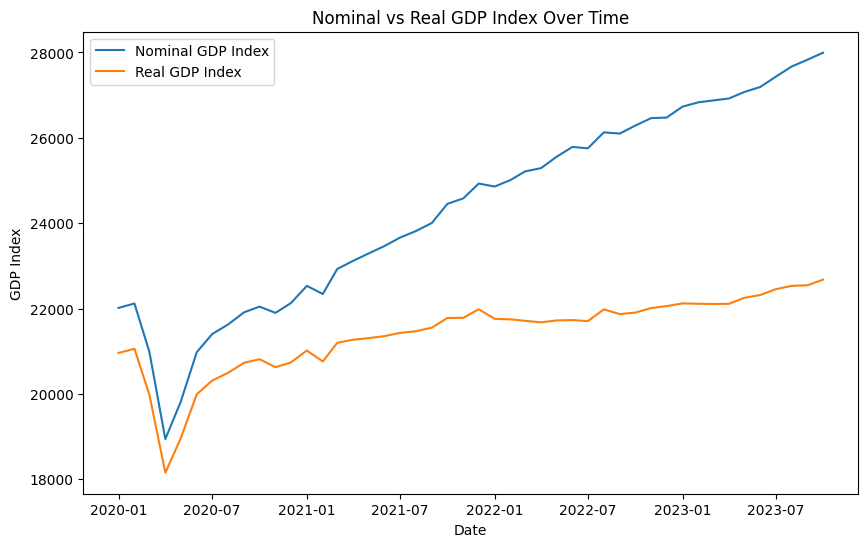

In [18]:
plt.figure(figsize=(10, 6))

# Построение графика для Nominal GDP Index
plt.plot(GDP['date'], GDP['Nominal GDP Index'], label='Nominal GDP Index')

# Построение графика для Real GDP Index
plt.plot(GDP['date'], GDP['Real GDP Index'], label='Real GDP Index')

# Добавление заголовка и подписей осей
plt.title('Nominal vs Real GDP Index Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Index')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

Возможно, имеет смысл объединить датафреймы, содержащие макроэкономические данные (однако стоит отметить тот факт, что данные выходят в разные дни и необходимо отразить изменения в датафрейме)

In [23]:
!pip install mpl_finance

Note: you may need to restart the kernel to use updated packages.


необходимо учесть див отсечки (возможно)

d:\works\python\Lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


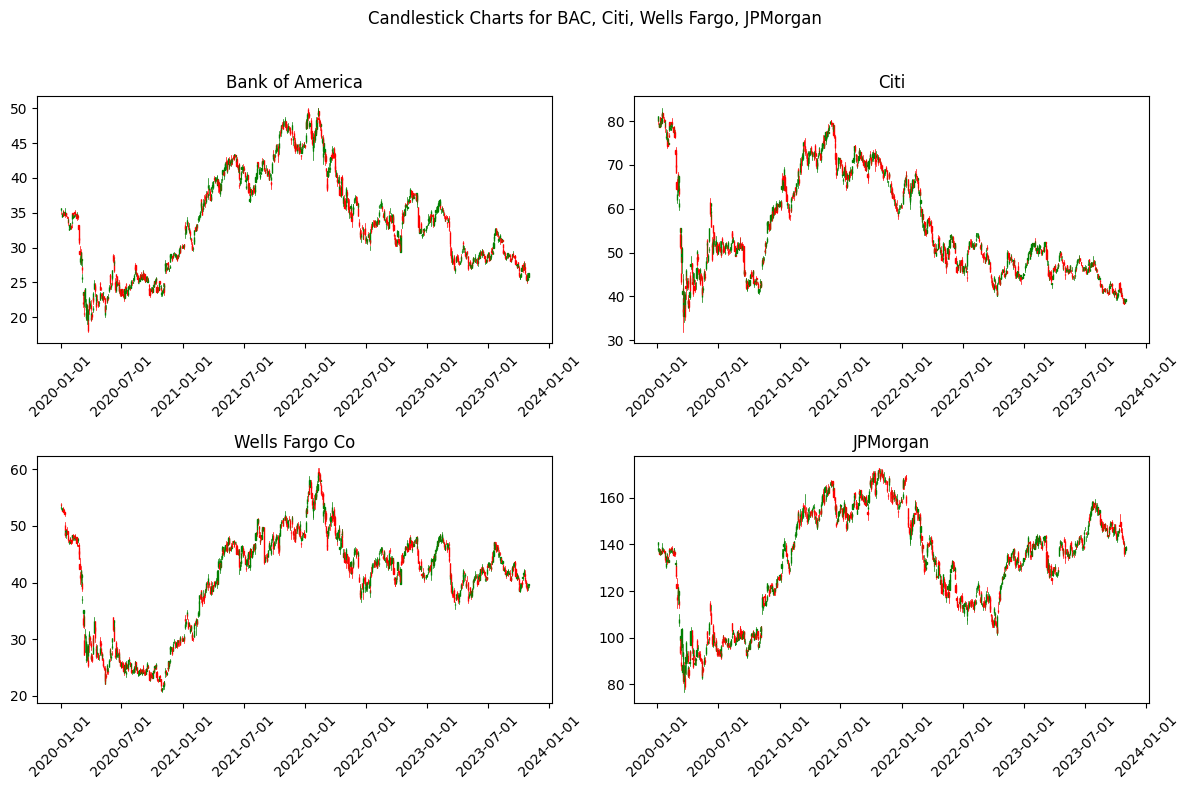

In [19]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

# График для Banc of America

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# График для BAC
axs[0, 0].set_title('Bank of America')
candlestick_ohlc(axs[0, 0], zip(mdates.date2num(BAC['date']), BAC['Open'], BAC['Max'], BAC['Min'], BAC['Close']), width=0.6, colorup='g', colordown='r')

# График для Citi
axs[0, 1].set_title('Citi')
candlestick_ohlc(axs[0, 1], zip(mdates.date2num(Citi['date']), Citi['Open'], Citi['Max'], Citi['Min'], Citi['Close']), width=0.6, colorup='g', colordown='r')

# График для Wells Fargo
axs[1, 0].set_title('Wells Fargo Co')
candlestick_ohlc(axs[1, 0], zip(mdates.date2num(WFC['date']), WFC['Open'], WFC['Max'], WFC['Min'], WFC['Close']), width=0.6, colorup='g', colordown='r')

# График для JPMorgan
axs[1, 1].set_title('JPMorgan')
candlestick_ohlc(axs[1, 1], zip(mdates.date2num(JPM['date']), JPM['Open'], JPM['Max'], JPM['Min'], JPM['Close']), width=0.6, colorup='g', colordown='r')

# Добавим форматирование осей дат
for ax in axs.flat:
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Добавим общий заголовок
plt.suptitle('Candlestick Charts for BAC, Citi, Wells Fargo, JPMorgan')

# Регулировка расстояния между графиками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Отображение графиков
plt.show()

матрица корреляций

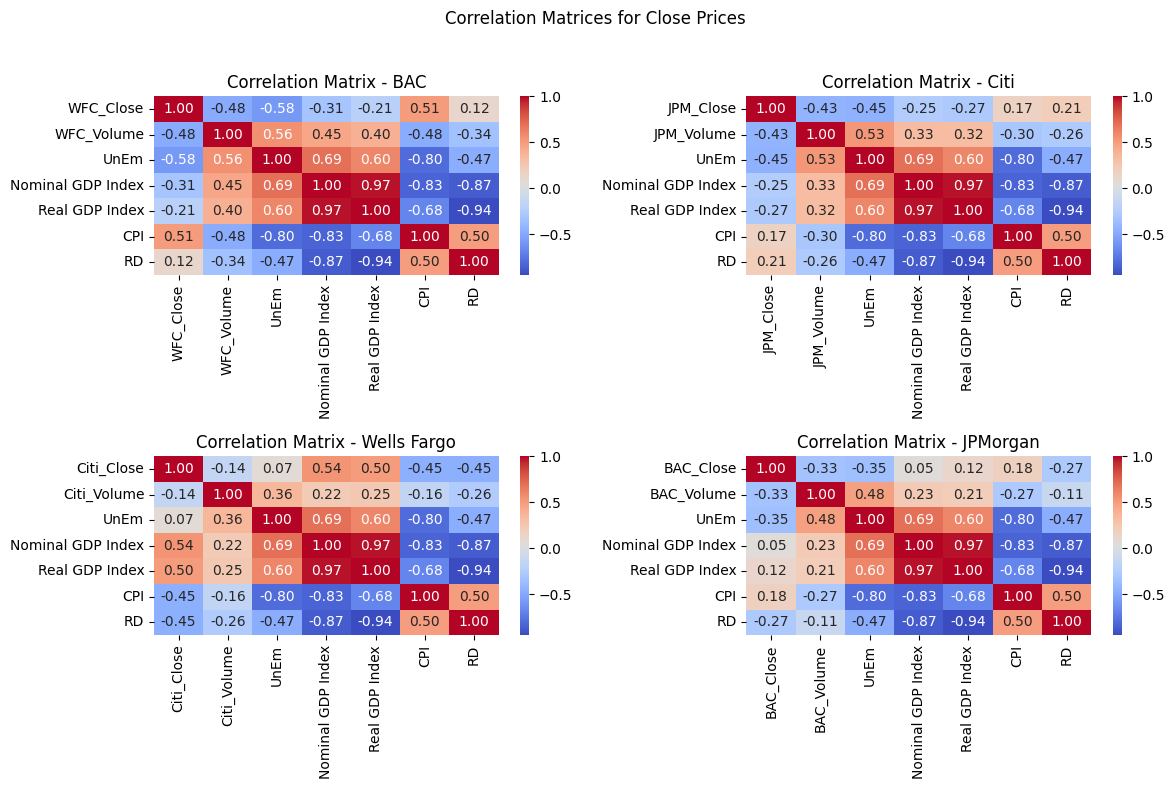

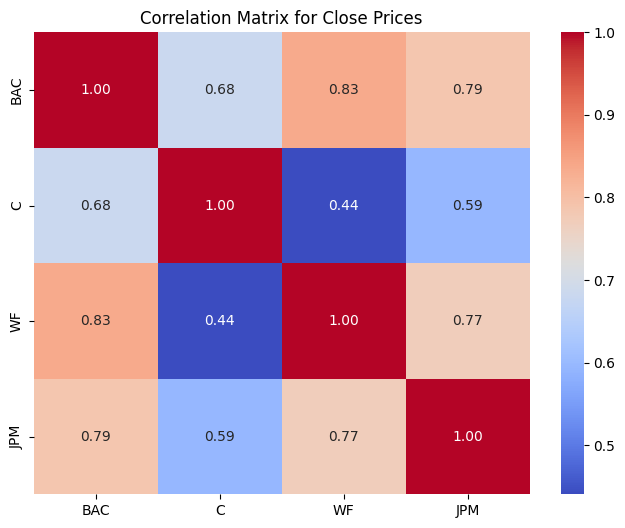

In [21]:
import seaborn as sns

# Создадим матрицу корреляции цен закрытия для каждого датафрейма
corr_WFC = all_df[['WFC_Close', 'WFC_Volume', 'UnEm', 'Nominal GDP Index', 'Real GDP Index', 'CPI', 'RD']].corr()
corr_JPM = all_df[['JPM_Close', 'JPM_Volume', 'UnEm', 'Nominal GDP Index', 'Real GDP Index', 'CPI', 'RD']].corr()
corr_Citi = all_df[['Citi_Close', 'Citi_Volume', 'UnEm', 'Nominal GDP Index', 'Real GDP Index', 'CPI', 'RD']].corr()
corr_BAC = all_df[['BAC_Close', 'BAC_Volume', 'UnEm', 'Nominal GDP Index', 'Real GDP Index', 'CPI', 'RD']].corr()

# Создадим матрицу корреляции между целевыми переменными (ценами закрытия) каждого датафрейма
corr_close = pd.concat([BAC['Close'], Citi['Close'], WFC['Close'], JPM['Close']], axis=1)
corr_close.columns = ['BAC', 'C', 'WF', 'JPM']
corr_close_matrix = corr_close.corr()

# Построим тепловые карты
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Тепловая карта для BAC
sns.heatmap(corr_BAC, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0, 0])
axs[0, 0].set_title('Correlation Matrix - BAC')

# Тепловая карта для Citi
sns.heatmap(corr_Citi, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0, 1])
axs[0, 1].set_title('Correlation Matrix - Citi')

# Тепловая карта для Wells Fargo
sns.heatmap(corr_WFC, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1, 0])
axs[1, 0].set_title('Correlation Matrix - Wells Fargo')

# Тепловая карта для JPMorgan
sns.heatmap(corr_JPM, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix - JPMorgan')

# Добавим общий заголовок
plt.suptitle('Correlation Matrices for Close Prices')

# Регулировка расстояния между графиками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Отображение графиков
plt.show()

# Тепловая карта для корреляции между ценами закрытия
plt.figure(figsize=(8, 6))
sns.heatmap(corr_close_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Close Prices')
plt.show()

Мне кажется лучше спреды посчитать между показателями и вывести графики (для анализа внутри каждого датафрейма с акциями)

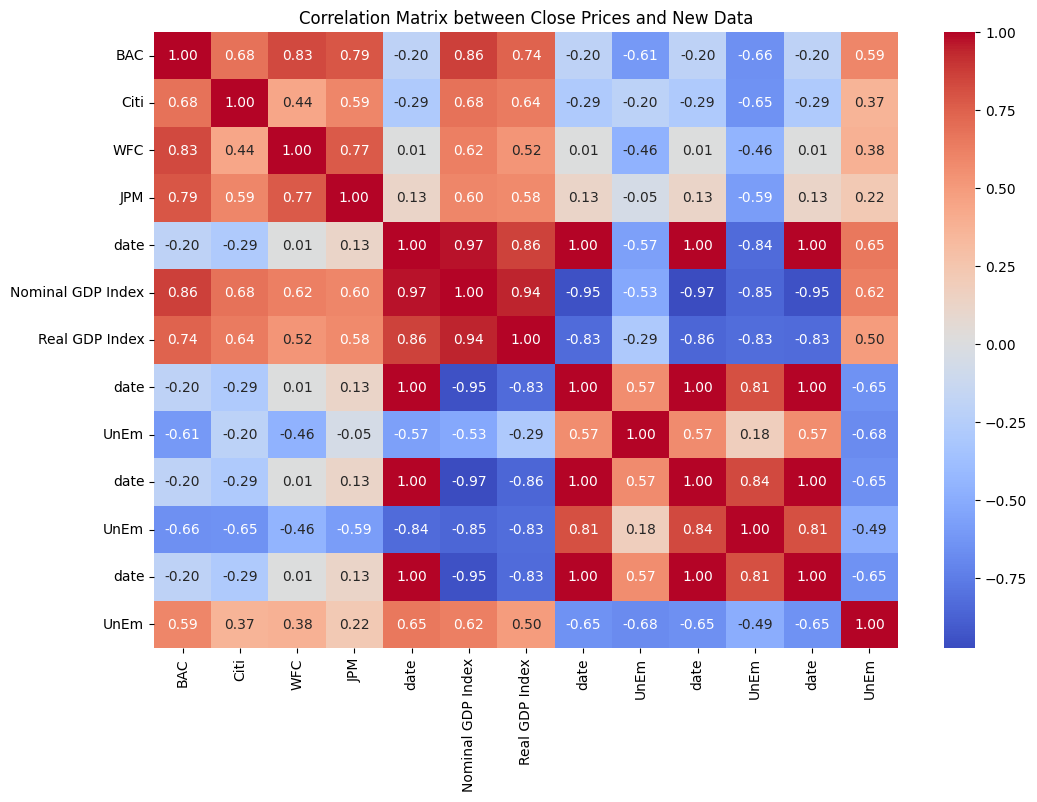

In [26]:
close_data = pd.concat([BAC['Close'], Citi['Close'], WFC['Close'], JPM['Close']], axis=1)
close_data.columns = ['BAC', 'Citi', 'WFC', 'JPM']

# Объединим новые данные
new_data = pd.concat([GDP, CPI, RD, UnEm], axis=1)

# Объединим оба датафрейма в один
merged_data = pd.concat([close_data, new_data], axis=1)
merged_data.rename(columns={'value': 'CPI', 'value': 'RD', 'value': 'UnEm'}, inplace=True)

# Построим матрицу корреляции
corr_matrix = merged_data.corr()

# Построим тепловую карту
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Close Prices and New Data')
plt.show()